In [881]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pymongo

In [849]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [850]:
client.list_database_names()

['Dumpster_DB',
 'Nasa',
 'SPY',
 'admin',
 'animals',
 'classDB',
 'config',
 'craigslist_app',
 'craigslist_db',
 'local',
 'myNewDB',
 'nhl_db',
 'team_db',
 'travel_db',
 'weather_app']

In [851]:
# ------------------------------------------------------------------------------------------------------------
# This is a key command to estanlish connection with my database: NASA that i predefined in MongoDB
# It is possible to mid-way establish connections with multiple databases and collections without any problems
# ------------------------------------------------------------------------------------------------------------
db = client['Nasa']

In [852]:
# Define database and collection
#db = Nasa will not work but db=client['Nasa'] works
collection = db.news

In [853]:
# -----------------------------------------------------------------------------------------------------
# Dictionary to be inserted into MongoDB
# This is a simple test to see if i had made the connection to MongoDB and can upsert a given dictionary
# --------------------------------------------------------------------------------------------------------
post = {
        'title': 'title...',
        'main link': 'href......',
        'navigation links': 'link1, link2, link3',
        'article': 'paragraph 1 + 2 + 3',
        'date': 20200126,
        'time published': 5
    }

# Insert dictionary into MongoDB as a document
collection.insert_one(post)

In [729]:
# Define database and collection
#db = client.nhl_db
#collection = db.articles

In [854]:
   post = {
        'title': 'piruz title',
        'lede': 'alemi lede',
        'date': 20100204,
        'time published': 5
    }

# Insert dictionary into MongoDB as a document
collection.insert_one(post)

In [882]:
!which chromedriver

In [883]:
# . Pops a Chromdrive blan screen
executable_path = {'executable_path': 'bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [733]:
# URL of page Mars.nasa to be scraped
# Fixed with the help of Lori Harris...... for pretify to work, it will not find the elements
# without using the HTML paersel instead of lXML
# ___________________________________________________
url = 'https://mars.nasa.gov/news/8558/global-storms-on-mars-launch-dust-towers-into-the-sky/'
browser.visit(url)
htmlb=browser.html
soup = BeautifulSoup(htmlb, 'html')

In [734]:
# Retrieve page with the requests module
#response = requests.get(url)
# Create BeautifulSoup object; parse with 'lxml'
#soup = BeautifulSoup(response.text, 'html')
#print(soup.prettify())

In [735]:
# .  Using Soup scrape based ona set of HTML Tags, the data needed
# . Here i run a set of tests:
anchor_href = soup.find("Div")
anchor_href

In [736]:
# Print all paragraph texts
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print(paragraph.text)

Mars Before and After Dust Storm: Side-by-side movies shows how the 2018 global dust storm enveloped the Red Planet, courtesy of the Mars Color Imager (MARCI) camera onboard NASA's Mars Reconnaissance Orbiter. This global dust storm caused NASA's Opportunity rover to lose contact with Earth. Credit: NASA/JPL-Caltech/MSSS. Full download ›
Dust storms are common on Mars. But every decade or so, something unpredictable happens: A series of runaway storms breaks out, covering the entire planet in a dusty haze. 
Last year, a fleet of NASA spacecraft got a detailed look at the life cycle of the 2018 global dust storm that ended the Opportunity rover's mission. And while scientists are still puzzling over the data, two papers recently shed new light on a phenomenon observed within the storm: dust towers, or concentrated clouds of dust that warm in sunlight and rise high into the air. Scientists think that dust-trapped water vapor may be riding them like an elevator to space, where solar radia

In [737]:
#----------------------------------------------------------------------------------------
#### Scraped the NASA Mars News Site and collected the latest News Title and Paragraph Text.
#### Saved these parsed variables for future reference 
#### 
#----------------------------------------------------------------------------------------

In [738]:
anchor_href = soup.find("a")["href"]
anchor_href
# Content wrap 

'http://www.nasa.gov'

In [739]:
anchor_href = soup.find("a")["href"]
anchor_href


'http://www.nasa.gov'

In [740]:
# ------------------------------------------------------------------------
#  let BeautifulSoup find the links with existing href attributes only
# ------------------------------------------------------------------------
link_list = [a['href'] for a in soup.find_all('a', href=True)]
link_list

['http://www.nasa.gov',
 'https://science.nasa.gov/',
 '/mars-exploration/#',
 '#page',
 'javascript:void(0);',
 '/explore/mars-now',
 '/#red_planet',
 '/#red_planet/0',
 '/#red_planet/1',
 '/#red_planet/2',
 '/#red_planet/3',
 '/#red_planet/4',
 '/#red_planet/5',
 '/#mars_exploration_program',
 '/#mars_exploration_program/0',
 '/#mars_exploration_program/1',
 '/#mars_exploration_program/2',
 '/#mars_exploration_program/3',
 '/#mars_exploration_program/4',
 '/#mars_exploration_program/5',
 '/#mars_exploration_program/6',
 '/#news_and_events',
 '/news',
 '/events',
 '/#multimedia',
 '/multimedia/images/',
 '/multimedia/videos/',
 '/mars-exploration/missions/?category=167',
 '/mars-exploration/missions/?category=170',
 '/mars-exploration/missions/?category=171',
 '/mars-exploration/partners',
 'https://mars.nasa.gov/mars2020/',
 'https://mars.nasa.gov/msl/home/',
 'https://mars.nasa.gov/insight/',
 'https://mars.nasa.gov/maven/',
 'https://mars.nasa.gov/mro/',
 'https://mars.nasa.gov/ody

In [741]:
# go deeper into the anchor href and see what is inside?
r = requests.get("https://mars.nasa.gov/news/8558/global-storms-on-mars-launch-dust-towers-into-the-sky/", params=dict(
    query="<p>",
    page=1
))

print(r.text)

<!DOCTYPE html>
<html lang='en' xml:lang='en' xmlns='http://www.w3.org/1999/xhtml'>
<head>
<meta content='text/html; charset=utf-8' http-equiv='Content-Type'>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content='IE=edge,chrome=1' http-equiv='X-UA-Compatible'>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0MLWApSRU1eAQVVEhxfAUMVaF4WVg4VFxJbXhM=","queueTime":0,"applicationTime":495,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQcPUlZTDxAFXVRUBQEPVA==",licenseKey:"5e33925808",applicationID:"59562082"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __n

In [742]:
# go deeper into the anchor href and see what is inside?
r = requests.get("https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest", params=dict(
    query="<p>",
    page=1
))

print(r.text)

<!DOCTYPE html>
<html lang='en' xml:lang='en' xmlns='http://www.w3.org/1999/xhtml'>
<head>
<meta content='text/html; charset=utf-8' http-equiv='Content-Type'>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content='IE=edge,chrome=1' http-equiv='X-UA-Compatible'>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0MLWApSRU1eAQVVEhxSC1oSUlkWbBMHXwRAHhdcCUA=","queueTime":0,"applicationTime":358,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQcPUlZTDxAFXVRUBQEPVA==",licenseKey:"5e33925808",applicationID:"59562082"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return

In [743]:
#results = soup.find_all('div', class_='brand2')
titles = soup.find('title')
titles

<title>Global Storms on Mars Launch Dust Towers Into the Sky – NASA’s Mars Exploration Program </title>

In [744]:
divisions = soup.find_all('div')
divisions

[<div data-react-cache-id="BrowseHappier-0" data-react-class="BrowseHappier" data-react-props='{"gt":1,"lt":11}'></div>,
 <div data-react-cache-id="HiPO-0" data-react-class="HiPO" data-react-props="{}"><div class="" id="dashboard_modal" style="height: 100%;"><div></div><div class="content" id="dashboard_modal_content"></div></div></div>,
 <div class="" id="dashboard_modal" style="height: 100%;"><div></div><div class="content" id="dashboard_modal_content"></div></div>,
 <div></div>,
 <div class="content" id="dashboard_modal_content"></div>,
 <div id="main_container">
 <div id="site_body">
 <div class="site_header_area">
 <header class="site_header">
 <div class="brand_area">
 <div class="brand1">
 <a class="nasa_logo" href="http://www.nasa.gov" target="_blank" title="visit nasa.gov">NASA</a>
 </div>
 <div class="brand2">
 <a class="top_logo" href="https://science.nasa.gov/" target="_blank" title="Explore NASA Science">NASA Science</a>
 <a class="sub_logo" href="/mars-exploration/#" titl

In [745]:
 # Examine the results, then determine element that contains sought info
# results are returned as an iterable list
#divClass = soup.find_all('div', class_='brand2')
divClass = soup.find_all('div')
print(divClass)

[<div data-react-cache-id="BrowseHappier-0" data-react-class="BrowseHappier" data-react-props='{"gt":1,"lt":11}'></div>, <div data-react-cache-id="HiPO-0" data-react-class="HiPO" data-react-props="{}"><div class="" id="dashboard_modal" style="height: 100%;"><div></div><div class="content" id="dashboard_modal_content"></div></div></div>, <div class="" id="dashboard_modal" style="height: 100%;"><div></div><div class="content" id="dashboard_modal_content"></div></div>, <div></div>, <div class="content" id="dashboard_modal_content"></div>, <div id="main_container">
<div id="site_body">
<div class="site_header_area">
<header class="site_header">
<div class="brand_area">
<div class="brand1">
<a class="nasa_logo" href="http://www.nasa.gov" target="_blank" title="visit nasa.gov">NASA</a>
</div>
<div class="brand2">
<a class="top_logo" href="https://science.nasa.gov/" target="_blank" title="Explore NASA Science">NASA Science</a>
<a class="sub_logo" href="/mars-exploration/#" title="Mars">Mars E

In [746]:
# S P A N is used for in-line  vs. Div.
span = soup.find_all('span')
span

[<span class="menu_icon">
 menu
 </span>,
 <span class="modal_close_icon"></span>,
 <span style="visibility: visible;"><ul class="nav"><li class="nav_icon mars_now"><div class="nav_title"><a class="main_nav_item icon" href="/explore/mars-now" title="Mars Now"><span>Mars Now</span></a></div><div class="gradient_line"></div></li><li class=""><div class="arrow_box"><span class="arrow_down"></span></div><div class="nav_title" id="li_3"><a class="main_nav_item" href="/#red_planet" target="_self"><span>The Red Planet</span></a></div><div class="global_subnav_container"><ul class="subnav"><div><li><a class="" href="/#red_planet/0" target="_self"><span>Dashboard</span></a></li><li><a class="" href="/#red_planet/1" target="_self"><span>Science Goals</span></a></li><li><a class="" href="/#red_planet/2" target="_self"><span>The Planet</span></a></li><li><a class="" href="/#red_planet/3" target="_self"><span>Atmosphere</span></a></li><li><a class="" href="/#red_planet/4" target="_self"><span>Astro

In [747]:
# The HTML <li> tag represents a list item in ordered and unordered lists. The <li> tag is placed inside either 
# a <ol> tag or a <ul>  to represent each individual item within that list. It can also be used with the <menu> tag
li = soup.find('li')
print(li)

<li class="nav_icon mars_now"><div class="nav_title"><a class="main_nav_item icon" href="/explore/mars-now" title="Mars Now"><span>Mars Now</span></a></div><div class="gradient_line"></div></li>


In [748]:
li_text = soup.find('li').text
print(li_text)

Mars Now


In [749]:
# Examine the results, then determine element that contains sought info
# results are returned as an iterable list
results = soup.find_all('li')

# Loop through returned results
for result in results:
    # Error handling
    try:
        # Identify and return title of listing
        title = result.find('a').text
        # Identify and return paragraph of listing
        # pargraph = result.p.text
        # Identify and return link to listing
        link = result.a['href']

        # Run only if title, price, and link are available
        if (title or paragraph or link):
            # Print results
            print('------------------------- Title is: ---------------------------------')
            print(title)
            print('********************** paragraph is: ********************************')
            print(paragraph)
            print('______________________ Link is: _____________________________________')
            print(link)
            print(" <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< . >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
            # ---------------------------------------------------------------
            # Dictionary to be inserted as a MongoDB document
            # ---------------------------------------------------------------
            post = {
                'title': title,
                'paragraph': paragraph,
                'url': link
            }

            collection.insert_one(post)

    except Exception as e:
        print(e)

------------------------- Title is: ---------------------------------
Mars Now
********************** paragraph is: ********************************
<p>Managed by the Mars Exploration Program and the Jet Propulsion Laboratory for NASA’s Science Mission Directorate</p>
______________________ Link is: _____________________________________
/explore/mars-now
 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< . >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cannot encode object: <p>Managed by the Mars Exploration Program and the Jet Propulsion Laboratory for NASA’s Science Mission Directorate</p>, of type: <class 'bs4.element.Tag'>
------------------------- Title is: ---------------------------------
The Red Planet
********************** paragraph is: ********************************
<p>Managed by the Mars Exploration Program and the Jet Propulsion Laboratory for NASA’s Science Mission Directorate</p>
______________________ Link is: _____________________________________
/#red_planet
 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< . >

In [750]:
# -------------------------------------------------------------------------------------------
# URL of page Mars.nasa to be scraped
# Fixed with the help of Lori Harris...... for pretify to work, it will not find the elements
# without using the HTML parsel instead of lXML
# ____________________________________________________________________________________________
#url = 'https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA18433'
#browser.visit(url)
#htmlb=browser.html
#soup = BeautifulSoup(htmlb, 'html')

In [751]:
imgsrc = soup.find("img")["src"]
imgsrc

'/assets/logo_mars_trio_black@2x.png'

In [752]:
# ------------------------------------------------------------------------
#  let BeautifulSoup find the links with existing href attributes only
# ------------------------------------------------------------------------
#link_list = [a['href'] for a in soup.find_all('a', href=True)]
#link_list

In [867]:
# ----------------------------------------------------------------------
#                      Display items in MongoDB collection
#                Recall that db was set to = client['Nasa'] &
#                                 collection = db.news
# .               The latest records inserted are the correct ones!
# ---------------------------------------------------------------------
listings = db.news.find({})

for listing in listings:
    print(listing)

{'_id': ObjectId('5e2da7b2e2b1f2d9eb1af77b'), 'nasa_img': 'https://www.jpl.nasa.gov/images/spitzer/20200122/Spitzer-b/PIA23643-16.jpg', 'Title': 'NASA Jet Propulsion Laboratory (JPL) - Space Mission and Science News, Videos and Images', 'Text': '(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push(\n{\'gtm.start\': new Date().getTime(),event:\'gtm.js\'}\n);var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-NLDQZ25\');\n\n\n\n\n NASA Jet Propulsion Laboratory (JPL) - Space Mission and Science News, Videos and Images\n@import url("https://www.jpl.nasa.gov/assets/stylesheets/vendor/jquery.fancybox.css");@import url("https://www.jpl.nasa.gov/assets/stylesheets/vendor/jquery.fancybox-thumbs.css");html,body,div,span,applet,object,iframe,h1,h2,h3,h4,h5,h6,p,blockquote,pre,a,abbr,acronym,address,big,cite,c

In [755]:
#for child in title_tag.children:
#    print(child)

In [756]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
soup.title


<title>Global Storms on Mars Launch Dust Towers Into the Sky – NASA’s Mars Exploration Program </title>

In [757]:
soup.find_all('a')

[<a class="nasa_logo" href="http://www.nasa.gov" target="_blank" title="visit nasa.gov">NASA</a>,
 <a class="top_logo" href="https://science.nasa.gov/" target="_blank" title="Explore NASA Science">NASA Science</a>,
 <a class="sub_logo" href="/mars-exploration/#" title="Mars">Mars Exploration Program</a>,
 <a class="visuallyhidden focusable" href="#page">Skip Navigation</a>,
 <a class="menu_button" href="javascript:void(0);" id="menu_button">
 <span class="menu_icon">
 menu
 </span>
 </a>,
 <a class="modal_close" id="modal_close">
 <span class="modal_close_icon"></span>
 </a>,
 <a class="main_nav_item icon" href="/explore/mars-now" title="Mars Now"><span>Mars Now</span></a>,
 <a class="main_nav_item" href="/#red_planet" target="_self"><span>The Red Planet</span></a>,
 <a class="" href="/#red_planet/0" target="_self"><span>Dashboard</span></a>,
 <a class="" href="/#red_planet/1" target="_self"><span>Science Goals</span></a>,
 <a class="" href="/#red_planet/2" target="_self"><span>The Pla

In [758]:
# ------------------------------------------------------------------------------------
# https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars
# ------------------------------------------------------------------------------------
#                  Points to our Starting position of the URL for this propgram to work
#                  and is hard coded as:
# ------------------------------------------------------------------------------------
url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)
htmlb=browser.html
soup = BeautifulSoup(htmlb, 'html')

In [759]:
#https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars

In [760]:
#print(soup.prettify())

In [761]:
import time

In [762]:
# -------------------------------------------------------------------------------------
#                                 Find the Buttom by its Text to click.on
#                                 Location of our Firsyt Click !!!!!!!!!
#                               Make sure you are on the following page:
#                              https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars
# -----------------------------------------------------------------------------------------
# find id='full_image'
#browser.find_by_id('full_image').click()
browser.click_link_by_partial_text('FULL')
time.sleep(2)

In [763]:
#browser.find_by_name('FULL IMAGE').first.click()
# <img src="/spaceimages/images/mediumsize/PIA22892_ip.jpg" class="fancybox-image" style="display: inline;">
# <img src="/spaceimages/images/mediumsize/PIA22892_ip.jpg" class="fancybox-image" style="display: inline;">

In [764]:
imgsrc2 = soup.find("img")["src"]
imgsrc2

'/assets/images/logo_nasa_trio_black@2x.png'

In [765]:
soup.find_all("img")

[<img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>,
 <img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Nili Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23664-640x350.jpg" title="Nili Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Mamers Valles" class="thumb" src="/spaceimages/images/wallpaper/PIA23663-640x350.jpg" title="Mamers Valles"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Nili Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23662-640x350.jpg" title="Nili Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Hephaestus Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23661-640x350.jpg" title="Hephaestus Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/

In [766]:
# -------------------------------------------------------------------------------------------------------
#  let BeautifulSoup find the links with existing href attributes only. Works. Commented out for brevity
# ----------------------------------------------------------------------------------------------------
#link_list = [a['href'] for a in soup.find_all('a', href=True)]
#link_list

In [767]:
# Extract title text
title = soup.title.text
print(title)

Space Images


In [768]:
 # Print all paragraph texts
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print('------------')
    print(paragraph.text)

In [769]:
 # Print all texts within All Divisions
Divs = soup.find_all('div')
for div in Divs:
    print('------------')
    print(div.p)

------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
------------
None
----------

In [772]:
# ---reminder of where we are?
# .  and do not close the window as we have an instant of the window accessed
#                                                       Alemi 02/07/2020
browser.url

'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'

In [773]:
soup.title.parent.name

'head'

In [774]:
soup.name

'[document]'

In [775]:
soup.a

<a class="nasa_logo" href="http://www.nasa.gov" title="NASA">NASA</a>

In [776]:
# The <a> tag defines a hyperlink, which is used to link from one page to another.
# The most important attribute of the <a> element is the href attribute, which indicates the link's destination.
soup.find_all('a')

[<a class="nasa_logo" href="http://www.nasa.gov" title="NASA">NASA</a>,
 <a href="//www.jpl.nasa.gov/" id="jpl_logo" title="Jet Propulsion Laboratory">Jet Propulsion Laboratory</a>,
 <a href="http://www.caltech.edu/" id="caltech_logo" target="_blank" title="California Institute of Technology">California Institute of Technology</a>,
 <a class="visuallyhidden focusable" href="#main">Skip Navigation</a>,
 <a class="menu_button" href="javascript:void(0);" id="menu_button" title="menu button">
 <span class="menu_icon">menu and search</span>
 </a>,
 <a class="nasa_logo" href="http://www.nasa.gov" title=""></a>,
 <a class="" href="https://www.jpl.nasa.gov/" id="jpl_logo" title="">Jet Propulsion Laboratory</a>,
 <a class="" href="https://www.jpl.nasa.gov/" id="caltech_logo" title="">California Institute of Technology</a>,
 <a class="modal_close" id="modal_close" title="close menu">close menu</a>,
 <a class="menu_button modal_close" href="javascript:void(0);" id="menu_button" title="menu icon">

In [777]:
# some short tests with the soup commands
soup.find(id="menu_button")

<a class="menu_button" href="javascript:void(0);" id="menu_button" title="menu button">
<span class="menu_icon">menu and search</span>
</a>

In [778]:
soup.find(title="close menu")

<a class="modal_close" id="modal_close" title="close menu">close menu</a>

In [779]:
soup.find("head")

<head><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5e3dda872e530006&amp;bkl=0&amp;bl=1&amp;pdt=2580&amp;sid=5e3dda872e530006&amp;pub=&amp;rev=v8.28.3-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1581111943488&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__464046285509379650" type="text/javascript"></script><script src="https://z.moatads.com/addthismoatframe568911941483/moatframe.js" type="text/javascript"></script><script async="" src="https://script.crazyegg.com/pages/scripts/0025/5267.js?439197" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googl

In [780]:
soup.find("head").find("title")

<title>Space Images</title>

In [781]:
# -----------------------------------------------------------------------------------------------------
# A common task is to get all the links for the a attribute, as done here!
# I will load these links with their corresponding source (titles?) into MongoDB
# in a later step, as I utilize the click Commands thru this program, for navigation to the desired URL
#                                             alemi 02/07/2020
# -----------------------------------------------------------------------------------------------------
for link in soup.find_all('a'):
    print(link.get('href'))

http://www.nasa.gov
//www.jpl.nasa.gov/
http://www.caltech.edu/
#main
javascript:void(0);
http://www.nasa.gov
https://www.jpl.nasa.gov/
https://www.jpl.nasa.gov/
None
javascript:void(0);
/about
/about
/about/exec.php
/about/history.php
/about/reports.php
/contact_JPL.php
/opportunities/
/events
/events
/events/tours/views
/events/lectures.php
/events/speakers-bureau.php
/events/team-competitions.php
/events/special-events.php
/edu/
/edu/intern/
/edu/learn/
/edu/teach/
/edu/news/
/edu/events/
https://spaceplace.nasa.gov/menu/play/
/news
/news
/news/presskits.php
/news/factsheets.php
/news/mediainformation.php
http://blogs.jpl.nasa.gov
/missions/
/missions/?type=current
/missions/?type=past
/missions/?type=future
/missions/?type=proposed
/missions
/spaceimages
/spaceimages
/video
/infographics
/multimedia/audio.php
/apps/
/social
None
None
None
None
/social
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

In [785]:
# . This provides the list of images on the "first" page, but we are also interested in the images of the Next Click!
# . as we are digging deeper in the web scraping...
for images in soup.find_all('img'):
    print(images.get('src'))

/assets/images/logo_nasa_trio_black@2x.png
/assets/images/logo_nasa_trio_black@2x.png
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23664-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23663-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23662-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23661-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23660-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23659-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23658-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23657-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23656-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23655-640x350.jpg
/assets/images/overlay-arrow.png
/spaceimages/images/wallpaper/PIA23654-64

In [786]:
#---------------------------------------------------------------------------------------
# Print all tables headlines
# There were no Tables defined on  this page _ i kept the code for future reference
# . It is a nice loop to load data into an array called headlines, as we scrape the web!
# . after here we implement the Click command...
#---------------------------------------------------------------------------------------
tds = soup.find_all('td')
# A blank list to hold the headlines
headlines = []
# Loop over td elements
for td in tds:
    # If td element has an anchor...
    if (td.a):
        # And the anchor has non-blank text...
        if (td.a.text):
            # Append the td to the list
            headlines.append(td)
headlines

[]

In [787]:
# Another reminder of where we are on the browser?
browser.url

'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'

In [788]:
# -------------------------------------------------------------------------
# Must be the following URL for the Click to work!:
# https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars

In [789]:
#https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars

In [790]:
# -------------------------------------------------------------------------------------------------
# .                    N E X T
#                     C L I C K !!!! clearly shows the destination URL        
# -                                A Powerfull command! that goes deeper in scraping
# -------------------------------------------------------------------------------------------------
# Note:    You must be on the "right" page for the click to work........
# .        You cannot run this code twice!!! as you will be clicking on a non-existing click the second time
# Each change in url is time dependent, conditional on Server's response time, so for safety we add
# a wait time internally for our program, before we scrape the next url
# -------------------------------------------------------------------------------------------------
browser.click_link_by_partial_text('more info')

In [791]:
time.sleep(2)

In [792]:
browser.url

'https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15256'

'<html style="" class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-"><!-- START HEADER: "DEFAULT" --><!-- Google Tag Manager --><head><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5e3ddbcf84dcf0c9&amp;bkl=0&amp;bl=1&amp;pdt=709&amp;sid=5e3ddbcf84dcf0c9&amp;pub=&amp;rev=v8.28.3-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2Fdetails.php%3Fid%3DPIA15256&amp;fr=spaceimages%2F%3Fsearch%3D%26category%3DMar
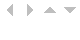

In [795]:
#---------------------------------------------------------------------------
# The Click gets us the "next" new_html page / and its URL
# And is the url we need: https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15256
new_html = browser.html
new_html

In [796]:
# https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars
#url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
#browser.visit(url)
#htmlb=browser.html
#soup = BeautifulSoup(htmlb, 'html')

In [577]:
#------------------------------------------------------------------------------------------------
# Make a new Soup out of this latest new URL (new-html), and use the html to parse it
# The new URL is: https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15256
#                                                          Alemi Feb 6 2020
#------------------------------------------------------------------------------------------------
soup = BeautifulSoup(new_html, 'html')
#print(soup.prettify())

In [797]:
imgsrc3 = soup.find("img")["src"]
imgsrc3

'/assets/images/logo_nasa_trio_black@2x.png'

In [798]:
# establish the full link for the images. Note that all links are relative to browsers position
fullimgsrc3 = browser.url + imgsrc3
fullimgsrc3

'https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15256/assets/images/logo_nasa_trio_black@2x.png'

In [799]:
imgsrcall = soup.find_all('img')[:]
imgsrcall

[<img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>,
 <img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Nili Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23664-640x350.jpg" title="Nili Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Mamers Valles" class="thumb" src="/spaceimages/images/wallpaper/PIA23663-640x350.jpg" title="Mamers Valles"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Nili Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23662-640x350.jpg" title="Nili Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="Hephaestus Fossae" class="thumb" src="/spaceimages/images/wallpaper/PIA23661-640x350.jpg" title="Hephaestus Fossae"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/

In [800]:
imgsrc4 = soup.find_all('img', alt="")[:]
#imgsrc4 = soup.find_all('img')[:]
imgsrc4

[<img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>,
 <img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>]

In [802]:
imgsrc4 = soup.find_all('img', class_="")[:]
#imgsrc4 = soup.find_all('img')[:]
imgsrc4

[<img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" src="/assets/images/overlay-arrow.png"/>,
 <img alt="more arrow" sr

In [803]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://www.nasa.gov
//www.jpl.nasa.gov/
http://www.caltech.edu/
#main
javascript:void(0);
http://www.nasa.gov
https://www.jpl.nasa.gov/
https://www.jpl.nasa.gov/
None
javascript:void(0);
/about
/about
/about/exec.php
/about/history.php
/about/reports.php
/contact_JPL.php
/opportunities/
/events
/events
/events/tours/views
/events/lectures.php
/events/speakers-bureau.php
/events/team-competitions.php
/events/special-events.php
/edu/
/edu/intern/
/edu/learn/
/edu/teach/
/edu/news/
/edu/events/
https://spaceplace.nasa.gov/menu/play/
/news
/news
/news/presskits.php
/news/factsheets.php
/news/mediainformation.php
http://blogs.jpl.nasa.gov
/missions/
/missions/?type=current
/missions/?type=past
/missions/?type=future
/missions/?type=proposed
/missions
/spaceimages
/spaceimages
/video
/infographics
/multimedia/audio.php
/apps/
/social
None
None
None
None
/social
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

In [828]:
browser.url

'https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15256'

In [842]:
# Mars_data is a collection [], of dictionaries to be inserted into MongoDB
mars_data=[]

In [857]:
# ---------------------------------------------------------------------------------------------------------------
# .  These are the set of images in the "Second" link
# .  We need to clean it up further and exclude the .png as we are not interested in Logos, just real Nasa pictures!
# .  pngs don't have titles = None, but there were 2 other valid pictures that we excluded because Title = None
# ---------------------------------------------------------------------------------------------------------------
# mars_data.append(dictionary)
for link in soup.find_all('img'):
    titles=link.get('title')
    if (titles is not None):
            img_url = link.get('src')
            full_url = 'https://www.jpl.nasa.gov'+img_url
            post = {"title":titles,"img_url":full_url} 
            collection.insert_one(post)
            print(titles)
            #print(link.get('src'))
            print(full_url)

Nili Fossae
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23664-640x350.jpg
Mamers Valles
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23663-640x350.jpg
Nili Fossae
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23662-640x350.jpg
Hephaestus Fossae
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23661-640x350.jpg
Ascraeus Mons Flank
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23660-640x350.jpg
Auqakuh Vallis
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23659-640x350.jpg
Acidalia Planitia Crater
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23658-640x350.jpg
Cerberus Fossae
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23657-640x350.jpg
Arabia Terra Channel
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23656-640x350.jpg
Naktong Vallis
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23655-640x350.jpg
Tractus Catena
https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23654-640x

In [856]:
# -----------------------------------------------------------------------
#  mars_data.append(dictionary) was done in the previous loop command
#  This array of dictionaries is now ready for a mongoDB upsert
# -----------------------------------------------------------------------
mars_data

[{'title': 'Nili Fossae',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23664-640x350.jpg'},
 {'title': 'Mamers Valles',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23663-640x350.jpg'},
 {'title': 'Nili Fossae',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23662-640x350.jpg'},
 {'title': 'Hephaestus Fossae',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23661-640x350.jpg'},
 {'title': 'Ascraeus Mons Flank',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23660-640x350.jpg'},
 {'title': 'Auqakuh Vallis',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23659-640x350.jpg'},
 {'title': 'Acidalia Planitia Crater',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23658-640x350.jpg'},
 {'title': 'Cerberus Fossae',
  'img_url': 'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23657-640x350.jpg'},
 {'title': 'Arabia T

In [866]:
db.collection.find()

In [830]:
# The url we want is: https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA19346
browser.visit(url)
browser.url

'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'

In [637]:
soup.title.text

'NASA Jet Propulsion Laboratory (JPL) - Space Mission and Science News, Videos and Images'

In [832]:
import pandas as pd

In [841]:
# ---------------------------------------------------------------------------------------
# .      An example of using Pandas to scrape! as well from Mercury planet, sorry i got side tracked...
# .      It was recorded by Assyrians first in 14th century BC
#                                                           Noted by Alemi 02/07/2020
# -----------------------------------------------------------------------------------------
MercuryFacts= "https://space-facts.com/mercury/"
Mercury_read = pd.read_html(MercuryFacts)
Mercury_read
# This read would make sense if there was some tables

[                      0                              1
 0             Diameter:                       4,879 km
 1                 Mass:  3.29 × 10^23 kg (0.06 Earths)
 2                Moons:                           None
 3       Orbit Distance:        57,909,227 km (0.39 AU)
 4         Orbit Period:                        88 days
 5  Surface Temperature:                  -173 to 427°C
 6         First Record:                14th century BC
 7          Recorded By:           Assyrian astronomers,
                       0                              1
 0             Diameter:                       4,879 km
 1                 Mass:  3.29 × 10^23 kg (0.06 Earths)
 2                Moons:                           None
 3       Orbit Distance:        57,909,227 km (0.39 AU)
 4         Orbit Period:                        88 days
 5  Surface Temperature:                  -173 to 427°C
 6         First Record:                14th century BC
 7          Recorded By:           Assyrian ast

In [638]:
# find the main image called featured_image_url as in Specs
# This is classified as main_image:
img_url1 = soup.find('img', class_='main_image')
img_url1

In [639]:
# Note: find_all returns an array, as expected 
img_urlall = soup.find_all('img', alt="previous article arrow", class_='')
img_urlall

[]

In [617]:
# ---------------------------------------------------------------
# .                        featured_image_url Captured!
# ---------------------------------------------------------------
img_url2 = img_url1.get('src')

final_image = browser.url + img_url2

print(final_image)

https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA15283/spaceimages/images/largesize/PIA15283_hires.jpg


In [602]:
img_url = soup.find_all('img', alt='')
#img_url = soup.find_all('img')
img_url[0]

<img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>

In [603]:
img_url[0].get('src')

'/assets/images/logo_nasa_trio_black@2x.png'

In [305]:
images=img_url.get('src')

In [306]:
full_image_url = "https://www.jpl.nasa.gov" + images
full_image_url
#      This finally gives us the link to one of the images on the right page!         Alemi 02062020

'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA09320_hires.jpg'

In [307]:
soup.title.text
#    for A Splendor seldom seen!

'Space Images | Full Disk Image of the Sun, March 26, 2007'

In [625]:
# URL of page to be scraped
url = 'https://www.jpl.nasa.gov/'
browser.visit(url)
# Retrieve page with the requests module
response = requests.get(url)
# Create BeautifulSoup object; parse with 'lxml'
soup = BeautifulSoup(response.text, 'html')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]-->
<html>
 <!-- START HEADER: "DEFAULT" -->
 <!-- Google Tag Manager -->
 <head>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push(
{'gtm.start': new Date().getTime(),event:'gtm.js'}
);var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-NLDQZ25');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <!-- Always force latest IE rendering engine or request Chrome Frame -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <title>
   NASA Jet Propulsion Laboratory (JPL) - Space Mission and Science News, Videos a

In [626]:
# Print only the headlines
for x in range(0):
    print(headlines[x].text)

In [877]:
# ______________________________________________________
# . S K I P          T H I S        S E C T I O N
# _______________________________________________________
# .   old code that was used as a test .......
# Retrieve the parent divs for all articles
results = soup.find_all('img src', class_='mixed-feed__item--article')

# Loop through results to retrieve article title, header, and timestamp of article
for result in results:
    title = result.find('h4', class_='mixed-feed__header').text

    lede = result.find('h5', class_='mixed-feed__subheader').text

    # The time and date of article publication
    date = result.find('time')['datetime']
    # Slice the datetime string for the date
    article_date = date[:10]
    # Slice the datetime string for the time
    time = date[11:16]
    # Determine whether article was published in AM or PM
    if (int(time[:2]) >= 13):
        meridiem = 'pm'
    else:
        meridiem = 'am'

    # Concatenate time string
    time = time + meridiem
    print('-----------------')
    print(title)
    print(lede)
    print(article_date)
    print(time)

    # Dictionary to be inserted into MongoDB
    post = {
        'title': title,
        'lede': lede,
        'date': article_date,
        'time published': time
    }

    # Insert dictionary into MongoDB as a document
    collection.insert_one(post)
results

<img alt="" class="print_only print_logo" src="/assets/images/logo_nasa_trio_black@2x.png"/>

In [628]:
from splinter import Browser

In [629]:
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

In [630]:
# Works!!!!!
executable_path = {'executable_path': './bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [631]:
# import necessary libraries
from flask import Flask, render_template

In [632]:
from flask import Flask, render_template

# Import our pymongo library, which lets us connect our Flask app to our Mongo database.
import pymongo

In [633]:

# Create an instance of our Flask app.
app = Flask(__name__)

# Create connection variable
conn = 'mongodb://localhost:27017'

In [634]:
# Pass connection to the pymongo instance.
client = pymongo.MongoClient(conn)

# Connect to a database. Will create one if not already available.
db = client.Nasa

# Drops collection if available to remove duplicates
#db.team.drop()

In [635]:
# Creates a collection in the database and inserts two documents
db.news.insert_many(
    [
        {
            'player': 'Piruz',
            'position': 'Point Guard'
        },
        {
            'player': 'Alemi',
            'position': 'Center'
        }
    ]
)


In [879]:
# We have inserted all the data one at a time. A batch insertion is unecessary at this stage
# db.news.insert_many(mars_data)

In [ ]:
# -----------------------------------------
# . Thank you!    Piruz Alemi Feb 7, 2020
# .               Have a Nice Day!!!
# -----------------------------------------

In [886]:
import splinter

In [887]:
if browser.is_text_present('splinter.readthedocs.io'):
    print("Yes, found it! :)")
else:
    print("No, didn't find it :(")

No, didn't find it :(


In [889]:
#browser.find_by_css('h1').first.visible